# Mini-Project 3 

## 1. Introduction

### Case overview
We are given a dataset containing data from the property market in King
County, USA.
The task is to use the dataset for training a regression model that can be used for
prediction of prices of properties not listed in the file.

Our response variable is price, but we have 20 potential explanatory variables. so we are going to need to figure our which features are best used as explanatory variables.


### The Dataset
##### Here is a link to the dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?datasetId=128&sortBy=voteCount

### Overview of the variables

#### There are 21 variables in this data set:

- id -  House ID
- date -  Date house sold
- price -  House price
- bedrooms -  Number of bedrooms
- bathrooms -  Number of bathrooms
- sqft_living -  Living room size (in sqft)
- sqft_lot -  Lot size (in sqft)
- floors -  Number of floors
- waterfront -  Has access to waterway (0 = no; 1 = yes)
- view -  View
- condition -  House condition (1 = bad; 5 = perfect)
- grade -  House grade
- sqft_above -  Above size (in sqft)
- sqft_basement -  Basement size (in sqft)
- yr_built -  Year when house was built
- yr_renovated -  Year when house was renovated
- zipcode -  House zipcode
- lat -  House latitude
- long -  House longitude
- sqft_living15 -  Living15 (in sqft)
- sqft_lot15 -  Lot15 (in sqft)



## 2. Import libraries

In [25]:
import numpy as np #linear algebra
import pandas as pd # data processing 
import seaborn as sns #plot data 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#show all columns at once 
pd.set_option('display.max_columns', None)

##  3. Read the data into a pandas dataframe

In [26]:
data = pd.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/house-data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 4. Initial exploration
When you get a brand new dataset, it can be very hard to know what to look for. Where should you start your exploration. Well, before you start the actually exploring, you should aim to familiarize yourself with the dataset. Here are some common functions to help us get familiarized with a dataset. 
- data.head()
- data.columns
- data.shape
- data.info()
- data.isnull().sum()
- data.describe()
- data.describe().transpose()
- data
- list(data)
- data.set_option('display.float_format', lambda x: '%.3f' % x)
- data.sample()


Once we have an idea for the data we can start to look for potential problems. Are there null values? Are there any fractions? Which variables are continuous and which are categorical. Do we need to binarize som categorical string values into numerical values?. Is the data for some variables heavily skewed or doesnt make sence(why is there 13 houses with 0 bedrooms). Are there any insane outliers?

### 4.1. visualisation

<Axes: xlabel='price', ylabel='Count'>

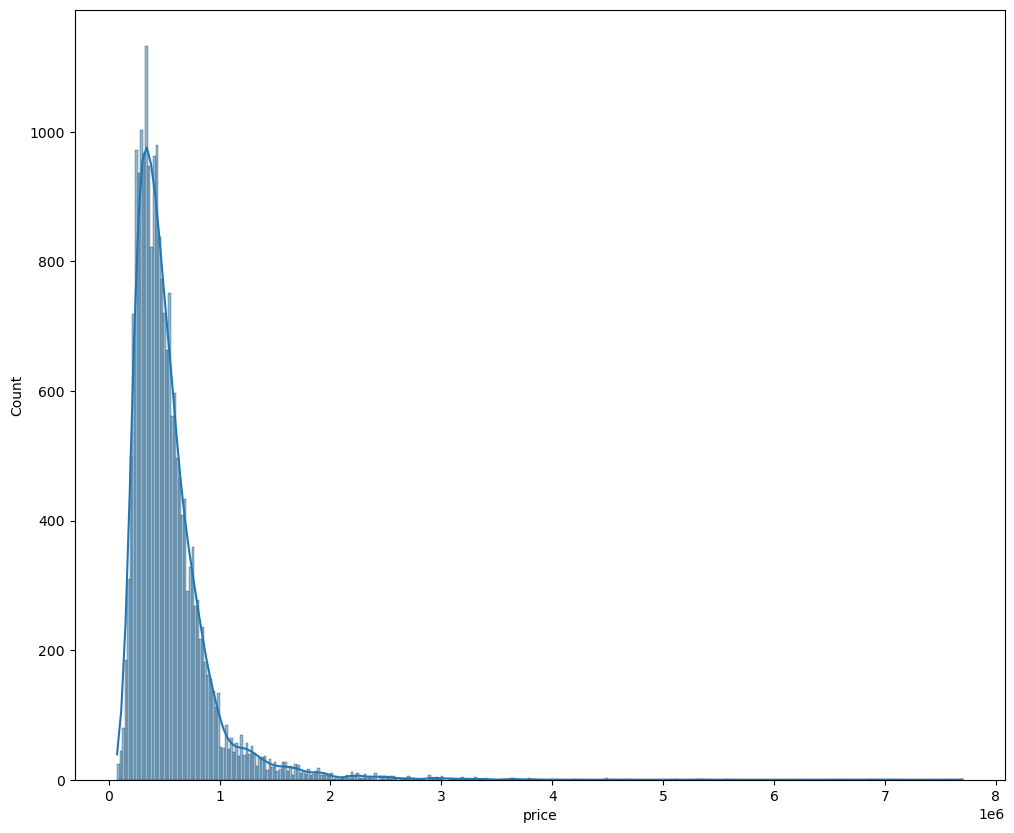

In [27]:
plt.figure(figsize=(12,10))
sns.histplot(data.price, kde=True)

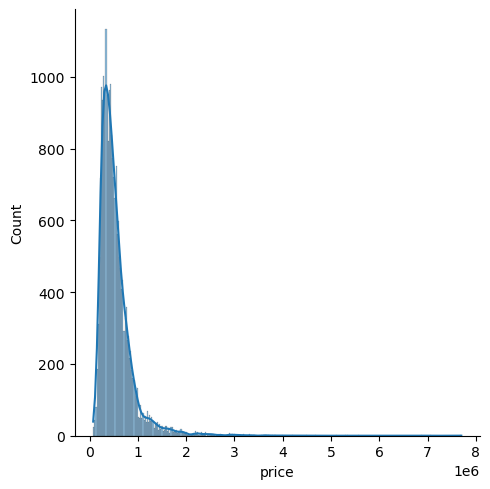

In [28]:
sns.displot(data.price,kde=True)

<Axes: xlabel='bedrooms', ylabel='count'>

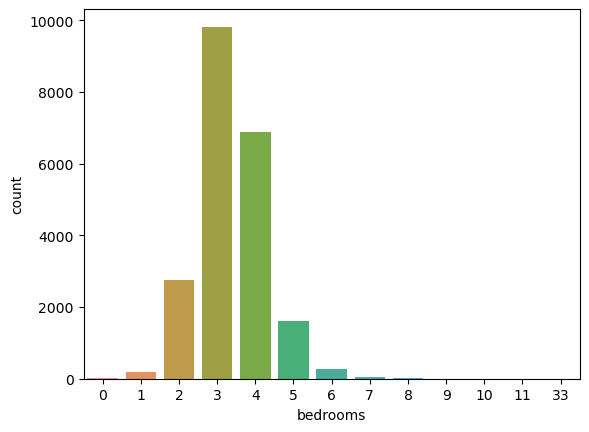

In [29]:
sns.countplot(data, x='bedrooms')

## 5. Investigate correlation with features
We can use our intuition to select some features that we expect have high cooralation. Common sence would suggest that theese features would have a somewhat noticable effect on property prices: 'sqft_living', 'bedrooms', 'bathrooms', 'grade', 'waterfront', 'view' and 'sqft_lot'. 

- With 'bedrooms', 'bathrooms', 'waterfront', 'view' and 'grade' I preferred boxplot because we have numerical data but they are not continuous. 

- For 'sqft_living', 'sqft_lot' i used scatterplot since they have continuous data.


<Axes: xlabel='sqft_living', ylabel='price'>

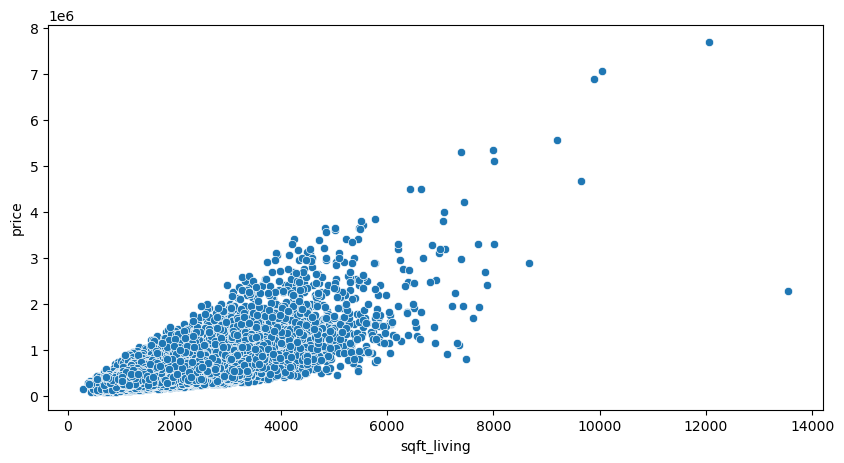

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sqft_living', y='price', data=data)

<Axes: xlabel='sqft_lot', ylabel='price'>

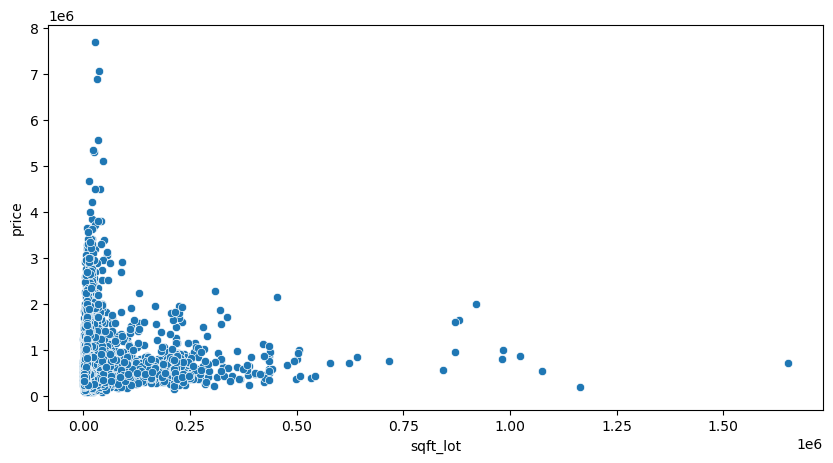

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sqft_lot', y='price', data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

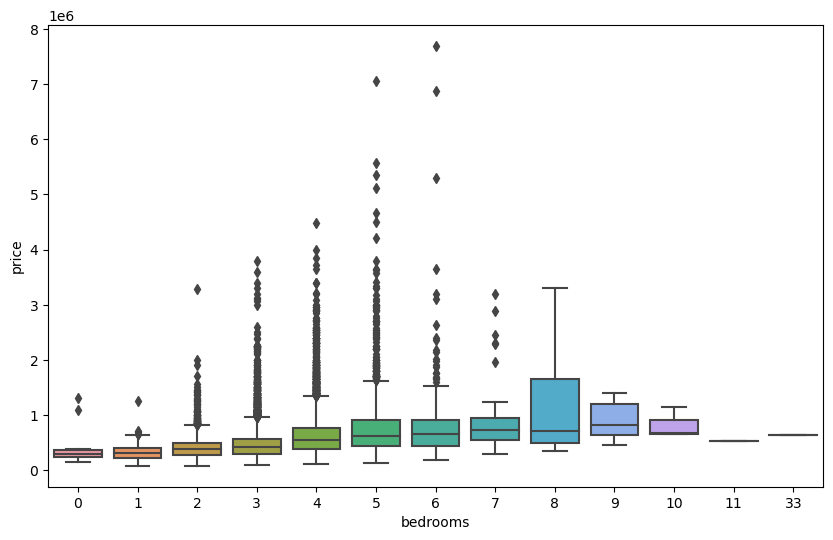

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='bedrooms', y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

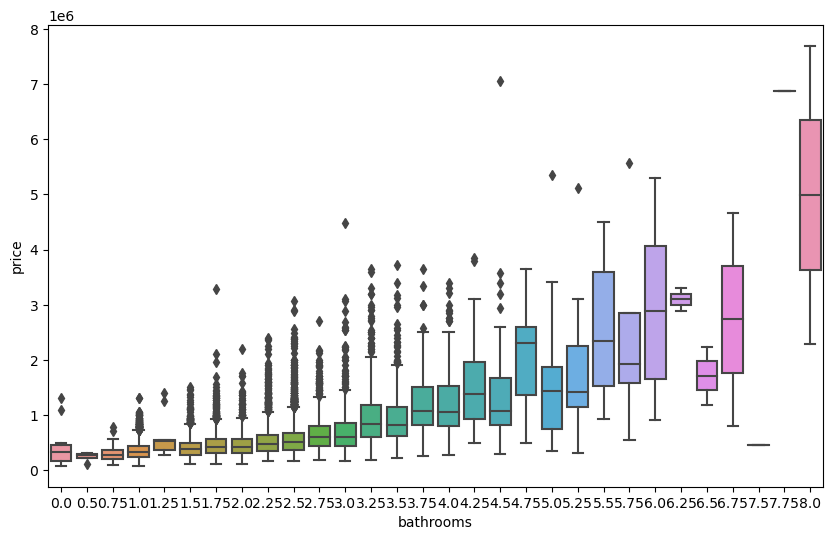

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='bathrooms',y='price')

<Axes: xlabel='grade', ylabel='price'>

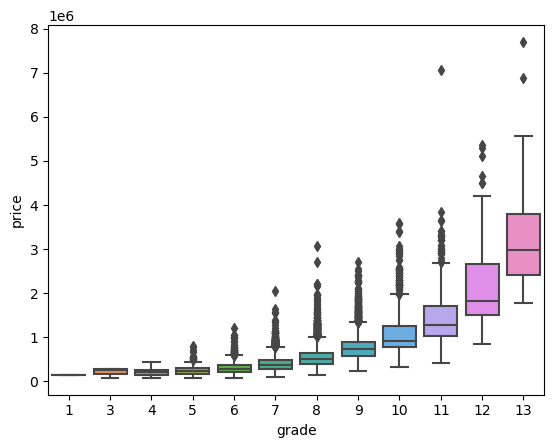

In [34]:
sns.boxplot(data=data, x='grade', y='price')

<Axes: xlabel='waterfront', ylabel='price'>

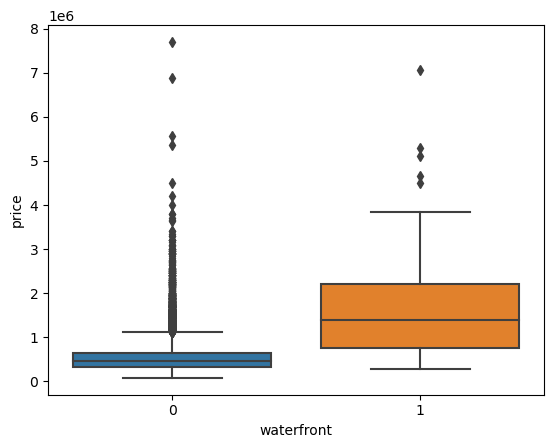

In [35]:
sns.boxplot(data=data, x='waterfront', y='price')

<Axes: xlabel='view', ylabel='price'>

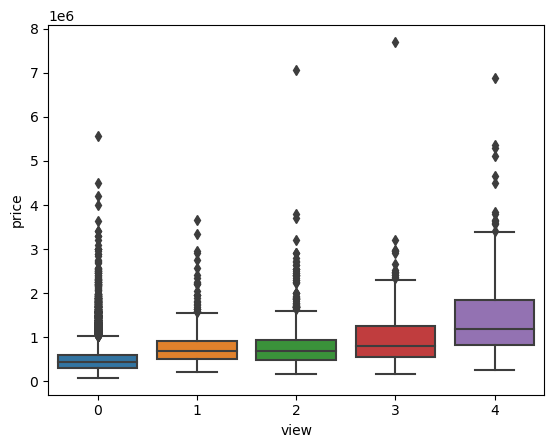

In [36]:
sns.boxplot(data=data, x='view', y='price')

### 5.1 Check  coorelation 
in the table below we see that our intuition was somewhat correct The 5 strongest coorelated features with price are:
- 1. sqft_living
- 2. grade
- 3. sqft_above (since both sqft_above and living both are highly related with price sqft_above should probably be removed if sqft_above and sqft_living have high inter-dependency)

- 4. sqft_living15
- 5. bathrooms

waterfront seems to be worse then we anticipated from the boxplots. It's important to remember that the dataset is far from perfect. Some people would remove some of the big outliers to improve the model, but in the real world there will always be statistical outliers and randomness. We might make another version where we remove the outliers to see if it improves the model. But this end up not effecting the accuracy of the model. The model aims to predict the real world. and a dataset made from the real world will almost curtainly contain outliers. So if we can keep theese properties eventhough they dont follow the overall trends in the property market, the model might be better to deal with such outliers. 


In [237]:
data.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### 5.2 Analysing the results 
It seems that there is not a perfect linear relationship between the price and these features. When we look at the above boxplots, grade and waterfront effect price visibly. On the other hand, view seem to effect less but it also has an effect on price. sqft_living seems to have some cooralation but sqft_lot seems to have a significantly weaker cooralation. Now we have some idea of which features effect price we can proceed. 

When we model a linear relationship between a response and just one explanatory variable, this is called simple linear regression. I want to predict house prices and then, our response variable is price. Our strongest feature seens to be sqft_living. But given our investegation even our strongest feature seems like it would'nt allow for accurate predictions from a simple linear regression model. We are still going to try. But we problably need to include some more features to impove the model. But having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Before we decide on additional features an important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqft_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqft_living and sqft_above. 

lets take at look at a correlation matrix:

### 5.3 correlation matrix
fsdfdsfsdfsdfsdfsfsddsf

dfsdfdsfsd

fsdfsdf

sdfsdf

<Axes: >

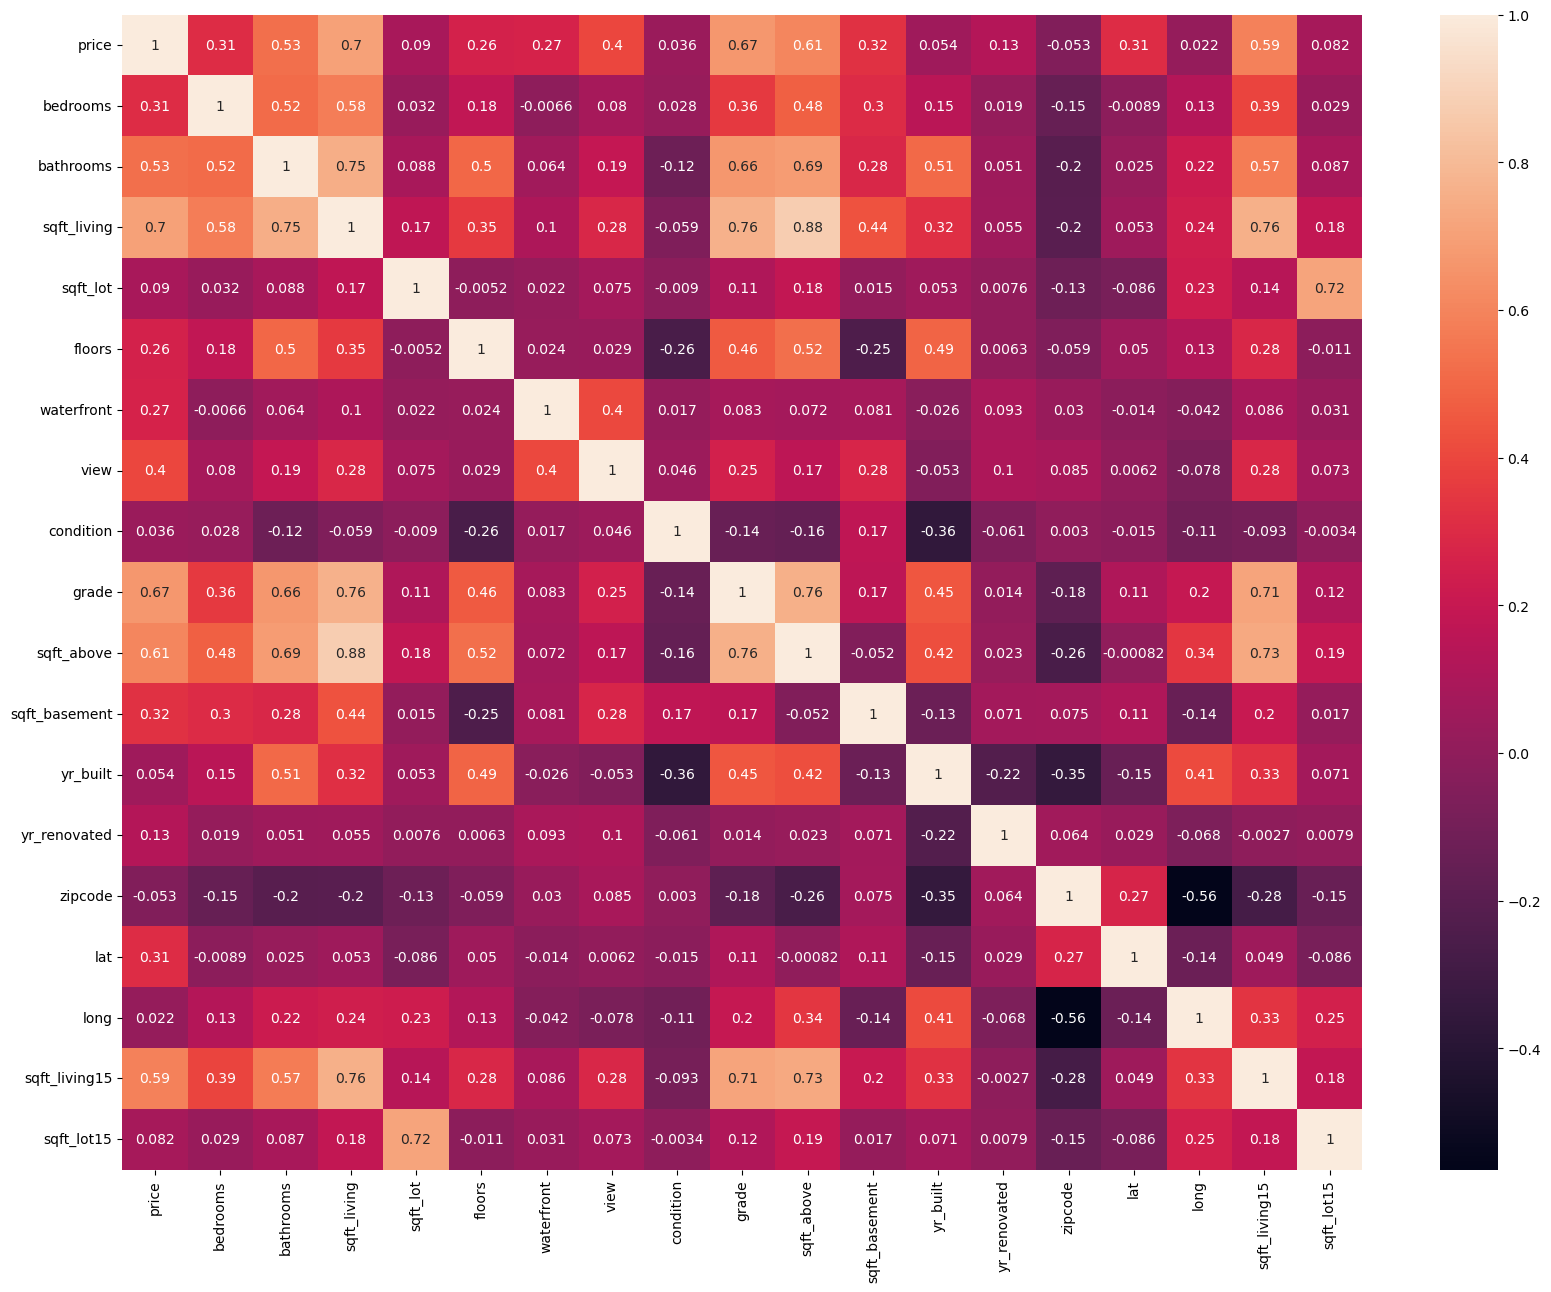

In [6]:
#data = data.drop('date',axis=1) (need to remove 'date' before calling data.corr() since date contains non-intable data) 
corr_matrix = tmp2.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)

## 6 Cleaning 
remove useless columns:
- id

- date

other things to think about:
- should we remove the most expensive properties
- should we remove properties with 0 bedrooms
- should we remove properties with 7-8 or more bedrooms 
- should take into account -> geography, demographics, age of property, time since renovation etc. 

In [213]:
#data = data.drop('id', axis = 1)
#data = data.drop('date',axis=1)
#data = data.drop('zipcode', axis = 1)

# 7 Train a Model

### 7.1 Splitting Dataset

In [37]:
# use the list to select a subset of the original DataFrame
X = data[['sqft_living', 'waterfront', 'grade']]

# print the first 5 rows
X.head()

,sqft_living,waterfront,grade
0,1180,0,7
1,2570,0,7
2,770,0,6
3,1960,0,7
4,1680,0,8


In [38]:
# select a Series from the DataFrame for y
y = data.price

# print the first 5 values
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [40]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16209, 3)
(16209,)
(5404, 3)
(5404,)


In [1]:
# create a model
linreg  = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [44]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = -573809.0982911933
bi = [1.70062478e+02 8.05430985e+05 9.82083466e+04]


In [46]:
# pair the feature names with the coefficients
list(zip(['sqft_living', 'waterfront', 'grade'], linreg.coef_))

[('sqft_living', 170.06247847370295),
 ('waterfront', 805430.9851853093),
 ('grade', 98208.34661147991)]

In [47]:
y_test

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
           ...    
12416     680000.0
8253      267500.0
4251      725000.0
11404     253500.0
13206     324950.0
Name: price, Length: 5404, dtype: float64

In [48]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [49]:
y_predicted

array([784540.33615376, 390851.1679013 , 909530.78841776, ...,
       753929.09002849, 222917.2051156 , 421034.5231233 ])

In [50]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [51]:
print(metrics.mean_absolute_error(y_test, y_predicted))

162047.49578161177


In [52]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

68606494227.01702


In [53]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

261928.41431776166


In [54]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.57


In [55]:
# R-squared
r2_score(y_test, y_predicted)

0.5715344932581723

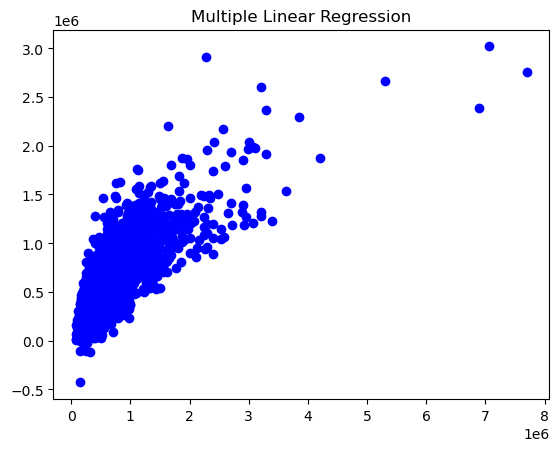

In [59]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')

In [60]:
# use the list to select a subset of the original DataFrame
X = data[['waterfront', 'grade']]

# select a Series from the DataFrame
y = data.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

287990.2063093432


In [61]:
# R-squared
r2_score(y_test, y_predicted)

0.4820282483793493

In [4]:
tmp = data.drop(['id'], axis = 1)
tmp2 = tmp.drop(['date'], axis=1)
tmp2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
target = tmp2['price']

In [7]:
tmp3 = tmp2.drop(['price'], axis = 1)
tmp3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
X_train, X_test, y_train, y_test = train_test_split(tmp3, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], data.shape[0]))

train size=17290, test_size=4323, total_size=21613


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model.coef_)))
reg_coeff = dict(zip(tmp3.columns, model.coef_))
print(reg_coeff)

num_ftrs = 18, num_coeff = 18 
{'bedrooms': -34335.41873920255, 'bathrooms': 44564.528880908845, 'sqft_living': 109.01581675749011, 'sqft_lot': 0.08884735387395097, 'floors': 7003.129520393021, 'waterfront': 562413.0700048605, 'view': 53641.10702207277, 'condition': 24526.710105316473, 'grade': 94567.8916969558, 'sqft_above': 70.02274091977043, 'sqft_basement': 38.99307582323273, 'yr_built': -2680.76889717866, 'yr_renovated': 20.415632846973253, 'zipcode': -552.2530375062214, 'lat': 595968.1221442182, 'long': -194585.724048081, 'sqft_living15': 21.214330609255754, 'sqft_lot15': -0.3258318728578944}


In [272]:
y_pred_train = model.predict(X_train)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model.predict(X_test)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

Quality Test 39311882352.23274
Quality Control 45173046132.79369


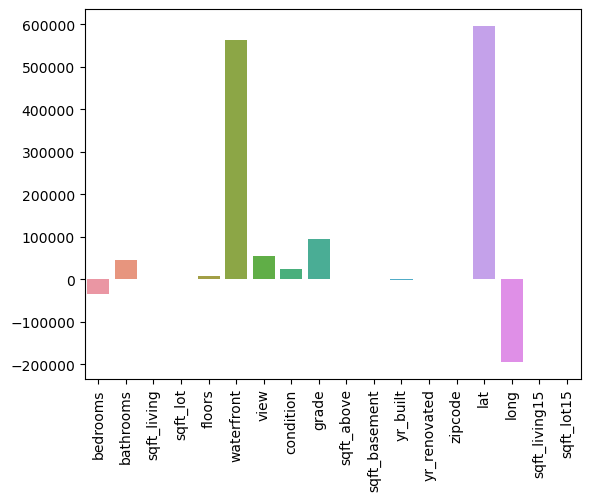

In [273]:
sns.barplot(x = X_train.columns, y=model.coef_)
plt.xticks(rotation=90);

In [267]:
print("Linear regression r2 score: ", r2_score(y_test,y_pred))

Linear regression r2 score:  0.7011904448878179


In [234]:
data2 = data.drop(['id'], axis = 1)
target = data2['price']
data2 = data.drop(['price'], axis = 1)
data2 = data.drop("date",axis=1)
data2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [228]:
X_train, X_test, y_train, y_test = train_test_split(data2, target, random_state=42, train_size=0.8, shuffle=True)

print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], data.shape[0]))

train size=17290, test_size=4323, total_size=21613


In [229]:
model = LinearRegression()
model.fit(X_train, y_train)
print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model.coef_)))
reg_coeff = dict(zip(data2.columns, model.coef_))
print(reg_coeff)

num_ftrs = 20, num_coeff = 20 
{'id': -6.294827480514815e-21, 'price': 0.9999999999999984, 'bedrooms': -2.0930720227573886e-11, 'bathrooms': -2.2098819398670065e-11, 'sqft_living': -6.535433112344345e-16, 'sqft_lot': -1.4821532903584002e-16, 'floors': 5.298367877002397e-11, 'waterfront': 1.7800147302828265e-10, 'view': -1.4443521196195993e-12, 'condition': -1.0189717197789378e-11, 'grade': -4.0489779859662165e-12, 'sqft_above': -6.185554976879093e-16, 'sqft_basement': -3.485272594437508e-17, 'yr_built': -2.7741094295547103e-13, 'yr_renovated': -7.581279102034612e-15, 'zipcode': 2.6857731891218577e-14, 'lat': -1.416046443330089e-11, 'long': 7.68237941768614e-12, 'sqft_living15': -8.594648503951938e-17, 'sqft_lot15': 1.1721916520934057e-16}


In [197]:
y_pred_train = model.predict(X_train)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model.predict(X_test)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))


Quality Test 9.40071237240776e-20
Quality Control 1.0944545432847366e-19


In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.15) 

In [135]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [138]:
# fit it to our data
myreg.fit(X_train, y_train)

LinearRegression()

In [139]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [143]:
a

array([-3.22442560e+04,  4.04176567e+04,  1.04154281e+02,  1.67435835e-01,
        9.58086261e+01,  5.92703663e+05,  4.98738537e+04,  3.08063373e+04,
        9.97892865e+04,  6.87207141e+01,  3.54335666e+01, -2.45837343e+03,
        1.99762166e+01,  5.60483237e+05, -1.14996312e+05,  2.96918083e+01,
       -4.03950133e-01])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], data.shape[0]))

<Axes: xlabel='price', ylabel='long'>

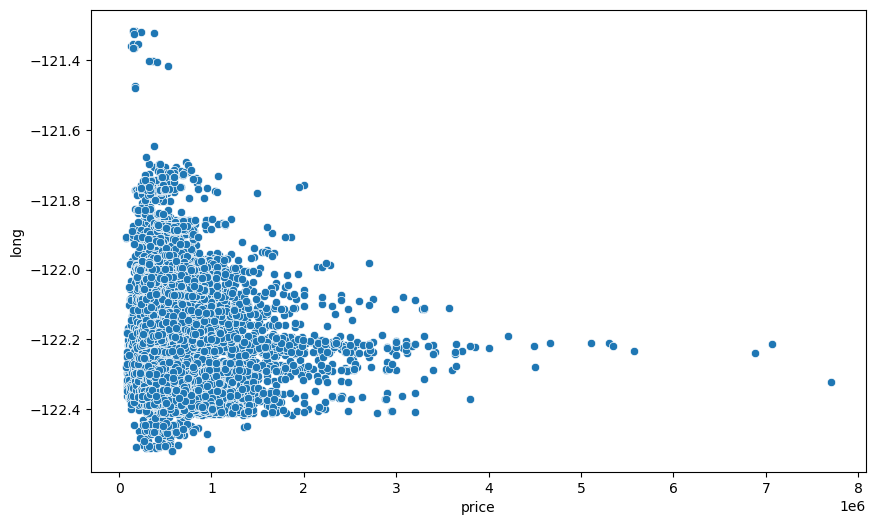

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='price',y='long')

<Axes: xlabel='price', ylabel='lat'>

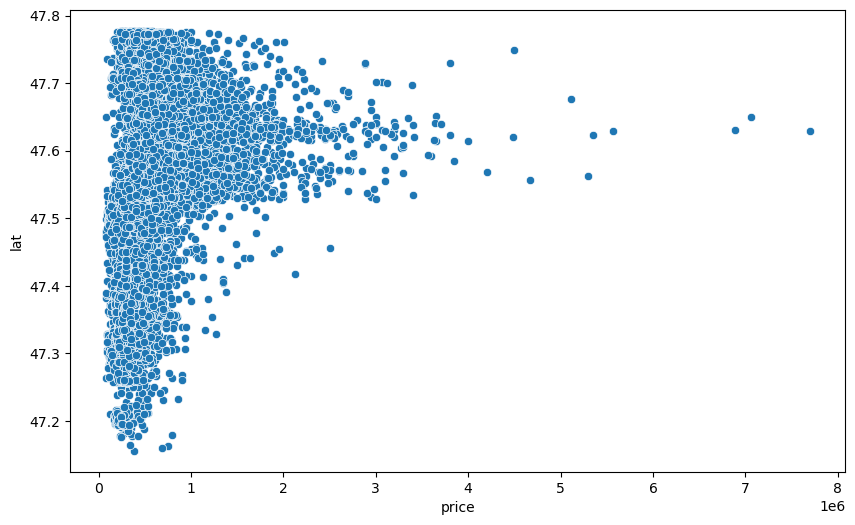

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='price',y='lat')

<Axes: xlabel='long', ylabel='lat'>

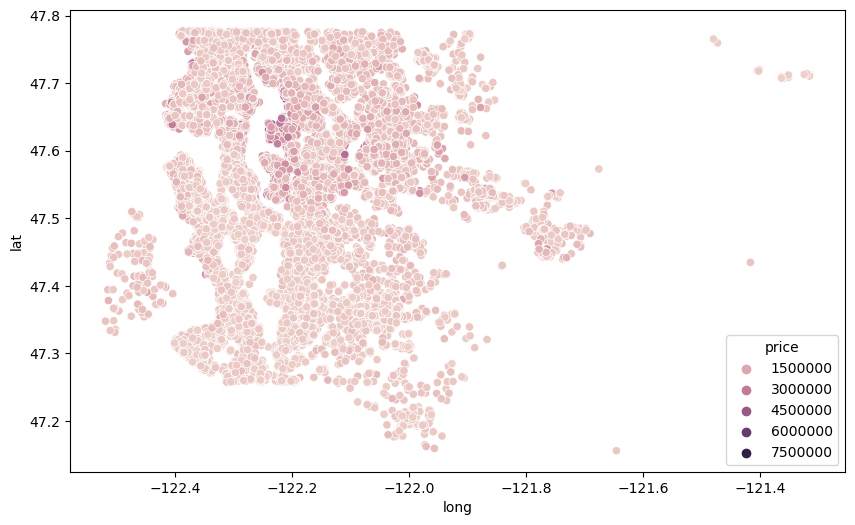

In [88]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='long',y='lat',hue='price')

In [89]:
data.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [90]:
len(data)*0.01

216.13

In [91]:
perc_99 = data.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

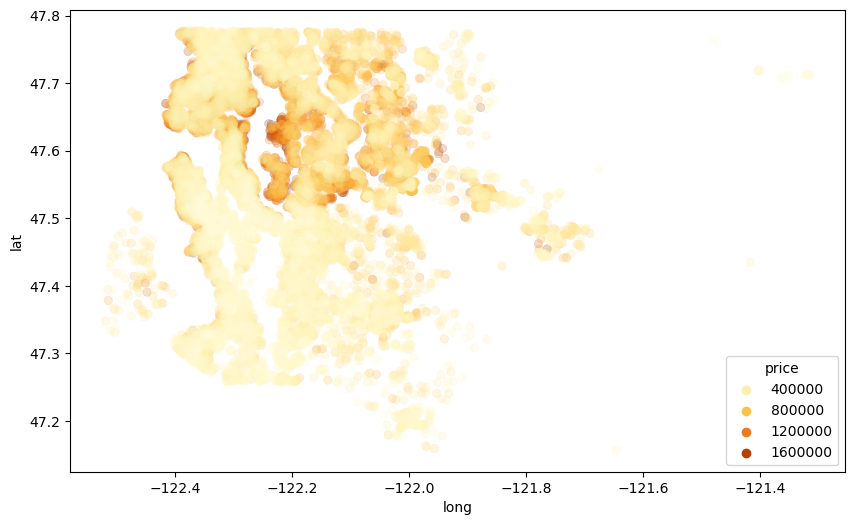

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=perc_99, x='long', y='lat', hue='price', alpha=0.2, palette = 'YlOrBr', edgecolor=None)

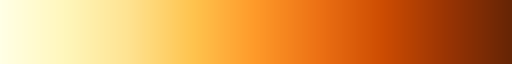

In [95]:
sns.color_palette("YlOrBr", as_cmap=True)

## 5. cleaning the data

